In [6]:
import numpy as np
import matplotlib.pyplot as plt
import xlwings as xw

from functools import reduce

Индекс потребительских цен на товары и услуги 

In [9]:
st1 = '100., 101.5, 102.1, 102.4, 103. , 100.7, 102.6, 103., 103.1, 100.7, 100. , 98.1, 99.4, 100.6, 97.4, 95.7'
arr2 = np.array(list(map(float, st1.split(', '))))
arr2

array([100. , 101.5, 102.1, 102.4, 103. , 100.7, 102.6, 103. , 103.1,
       100.7, 100. ,  98.1,  99.4, 100.6,  97.4,  95.7])

**скользящее среднее**

In [10]:
arr = arr2[:12]

In [11]:
def moving_average(arr, n):
    m_a = []
    for i in range(int(arr.shape[0]-n+1)):
        m_a.append(np.mean(arr[i:i+n]))
    return m_a

In [12]:
moving_average(arr, 2)

[100.75,
 101.8,
 102.25,
 102.7,
 101.85,
 101.65,
 102.8,
 103.05,
 101.9,
 100.35,
 99.05]

In [13]:
moving_average(arr, 3)

[101.2,
 102.0,
 102.5,
 102.03333333333335,
 102.09999999999998,
 102.10000000000001,
 102.89999999999999,
 102.26666666666667,
 101.26666666666667,
 99.59999999999998]

In [14]:
moving_average(arr, 4)

[101.5,
 102.25,
 102.05,
 102.17500000000001,
 102.32499999999999,
 102.35,
 102.35,
 101.7,
 100.475]

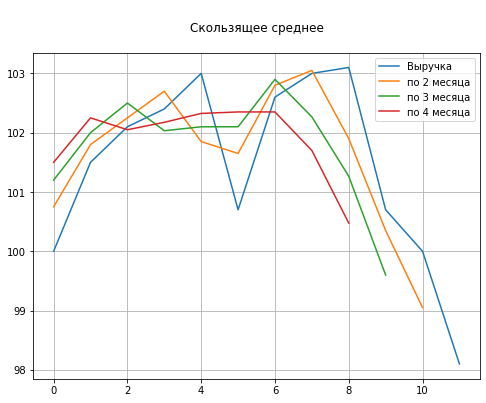

In [15]:
plt.title("\nСкользящее среднее\n")
fig = plt.gcf()
fig.set_size_inches(8, 6)
plt.grid()
plt.plot(arr, label='Выручка')
plt.plot(moving_average(arr, 2), label='по 2 месяца')
plt.plot(moving_average(arr, 3), label='по 3 месяца')
plt.plot(moving_average(arr, 4), label='по 4 месяца')
plt.legend()
plt.show()

**Абсолютное отклонение**

In [16]:
def absolute_deviation(arr, n, n1, moving_average_):
    a_d = []
    for i in range(n1-n, int(arr.shape[0] - n)):
        a_d.append(np.abs(arr[i + n] - moving_average_[i]))
    return a_d, np.mean(a_d)

In [17]:
reduce(sum, absolute_deviation(arr, 2, 4, moving_average(arr, 2)))

13.10624999999999

In [18]:
reduce(sum, absolute_deviation(arr, 3, 4,  moving_average(arr, 3)))

14.512499999999974

In [19]:
reduce(sum, absolute_deviation(arr, 4, 4, moving_average(arr, 4)))

14.39999999999998

**Относительное отклонение**


In [20]:
def relative_deviation(arr, n, n1, moving_average_):
    a_d = []
    for i in range(n1-n, int(arr.shape[0] - n)):
        a_d.append(np.abs(arr[i + n] - moving_average_[i]) / arr[i + n] * 100)
    return (a_d, np.mean(a_d))

In [21]:
# 2 мес
reduce(sum, relative_deviation(arr, 2,  4, moving_average(arr, 2)))

13.020916933014762

In [22]:
# 3 мес
reduce(sum, relative_deviation(arr, 3,  4, moving_average(arr, 3)))

14.4379788037105

In [23]:
# 4 мес
reduce(sum, relative_deviation(arr, 4,  4, moving_average(arr, 4)))

14.335337017598619

**Среднее квадратичное отклонение**

In [24]:
def standard_deviation(arr, n, n1, moving_average_):
    sumxmy2SUM = np.power(arr[n1:] - moving_average_[n1 - n:-1], 2).sum()
    return np.sqrt(sumxmy2SUM / arr[n1:].shape[0])

In [25]:
# 2 мес
standard_deviation(arr, 2, 4, moving_average(arr, 2))

1.6291293687120114

In [26]:
# 3 мес
standard_deviation(arr, 3, 4, moving_average(arr, 3))

1.8157872489180353

In [27]:
# 4 мес
standard_deviation(arr, 4, 4, moving_average(arr, 4))

1.8520681007997513

**скользящее среднее**

In [28]:
def moving_average(arr, n):
    m_a = []
    for i in range(int(arr.shape[0]-n+1)):
        m_a.append(np.mean(arr[i:i+n]))
    return m_a

In [29]:
moving_average(arr2, 4)

[101.5,
 102.25,
 102.05,
 102.17500000000001,
 102.32499999999999,
 102.35,
 102.35,
 101.7,
 100.475,
 99.54999999999998,
 99.525,
 98.875,
 98.27499999999999]

**Центрированная скользящая средняя**

In [30]:
def centered_moving_average(arr):
    return [np.mean(arr[i:i+2]) for i in range(len(arr)-1)]

In [31]:
centered_moving_average(moving_average(arr2, 4))

[101.875,
 102.15,
 102.11250000000001,
 102.25,
 102.33749999999999,
 102.35,
 102.025,
 101.0875,
 100.01249999999999,
 99.5375,
 99.2,
 98.57499999999999]

**Оценка сезонной компоненты**

In [32]:
osk = arr2[2:-2] - centered_moving_average(moving_average(arr2, 4))

In [33]:
ques = np.array([osk[2] + osk[6] + osk[10],
        osk[3] + osk[7] + osk[11],
        osk[0] + osk[4] + osk[8],
        osk[1] + osk[5] + osk[9]])

In [34]:
print(f'итого 1 кв за все годы: 1 - {ques[0]:.3f}, 2 - {ques[1]:.3f}, 3 - {ques[2]:.3f}, 4 - {ques[3]:.3f}')
print(f'средняя оценка СК I кв: 1 - {ques[0]/3:.3f}, 2 - {ques[1]/3:.3f}, 3 - {ques[2]/3:.3f}, 4 - {ques[3]/3:.3f}')

итого 1 кв за все годы: 1 - 2.162, 2 - 0.088, 3 - 0.475, 4 - -0.537
средняя оценка СК I кв: 1 - 0.721, 2 - 0.029, 3 - 0.158, 4 - -0.179


In [35]:
k = ques/3
k2 = k - k.mean()

In [36]:
# скорректированная сезонная компонента
k2

array([ 0.53854167, -0.153125  , -0.02395833, -0.36145833])

**Расчет значений Т+Е и Т+S**

In [37]:
# T+E =Yt-St

T_E = arr2 - np.tile(k2,4)

In [38]:
T_E 

array([ 99.46145833, 101.653125  , 102.12395833, 102.76145833,
       102.46145833, 100.853125  , 102.62395833, 103.36145833,
       102.56145833, 100.853125  , 100.02395833,  98.46145833,
        98.86145833, 100.753125  ,  97.42395833,  96.06145833])

In [39]:
def factors(x, y):
    b1 = ((x - x.mean()) * (y - y.mean())).sum()   / ((x - x.mean())**2).sum() 
    b0 = y.mean() - b1 * x.mean()
    return b0, b1

In [40]:
x = t
y = T_E 

bs_0 = factors(x, y)


print(f'T = B0+B1t по скольз: b0 = {bs_0[0]}, b1 = {bs_0[1]}')

y1 = arr2
x1 = t

bs_1 = factors(x1, y1)

print(f'T = B0+B1t по данным: b0 = {bs_1[0]}, b1 = {bs_1[1]}')

T = B0+B1t по скольз: b0 = 103.07395833333334, b1 = -0.28590686274509813
T = B0+B1t по данным: b0 = 103.20250000000001, b1 = -0.30102941176470577


_T скольз_

In [50]:
bs_0

(103.07395833333334, -0.28590686274509813)

In [51]:
t

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16.])

In [41]:
moving_t = bs_0[0] + bs_0[1]*t

In [49]:
moving_t

array([102.78805147, 102.50214461, 102.21623775, 101.93033088,
       101.64442402, 101.35851716, 101.07261029, 100.78670343,
       100.50079657, 100.21488971,  99.92898284,  99.64307598,
        99.35716912,  99.07126225,  98.78535539,  98.49944853])

In [43]:
T_S =  moving_t + np.tile(k2, 4)
T_S

array([103.32659314, 102.34901961, 102.19227941, 101.56887255,
       102.18296569, 101.20539216, 101.04865196, 100.4252451 ,
       101.03933824, 100.06176471,  99.90502451,  99.28161765,
        99.89571078,  98.91813725,  98.76139706,  98.1379902 ])

_E^2_

In [44]:
E_2 = np.power(arr2 - (np.tile(k2, 4) + moving_t), 2)
E_2

array([1.10662219e+01, 7.20834295e-01, 8.51548984e-03, 6.90772840e-01,
       6.67545070e-01, 2.55421232e-01, 2.40668074e+00, 6.62936281e+00,
       4.24632691e+00, 4.07344291e-01, 9.02034374e-03, 1.39622026e+00,
       2.45729182e-01, 2.82866229e+00, 1.85340195e+00, 5.94379620e+00])

_Т без сколь_

In [45]:
t_ = bs_1[0] + bs_1[1]*t
t_

array([102.90147059, 102.60044118, 102.29941176, 101.99838235,
       101.69735294, 101.39632353, 101.09529412, 100.79426471,
       100.49323529, 100.19220588,  99.89117647,  99.59014706,
        99.28911765,  98.98808824,  98.68705882,  98.38602941])

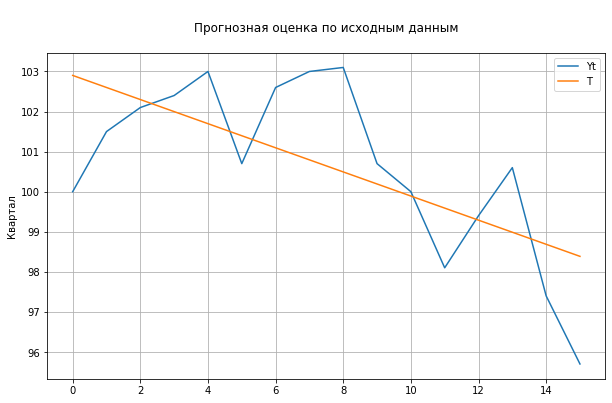

In [46]:
plt.title("\nПрогнозная оценка по исходным данным\n")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.grid()
plt.ylabel('Квартал')
plt.plot(arr2, label='Yt')
plt.plot(t_, label='Т')
plt.legend()
plt.show()

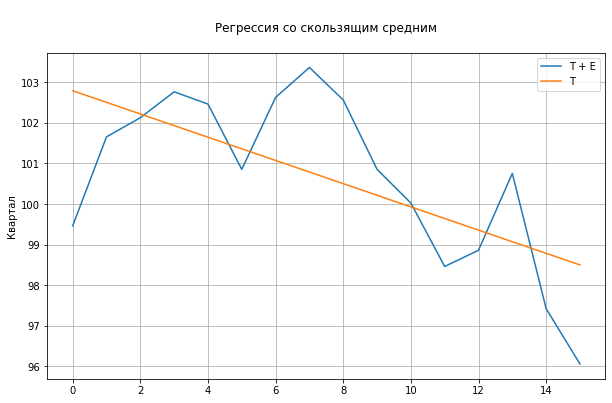

In [48]:
plt.title("\nРегрессия со скользящим средним\n")
fig1 = plt.gcf()
fig1.set_size_inches(10, 6)
plt.grid()
plt.ylabel('Квартал')
plt.plot(T_E , label='Т + E')
plt.plot(moving_t, label='Т')
plt.legend()
plt.show()